# ClimateWins Project

## Content
### 1. Importing libraries and data
### 2 . Applying CNN model for wether images recognition

## 1. Importing libraries and data 

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt

import tensorflow as tf

from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dense, Dropout

# from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Create a path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/02 Data/Original Data/Multi-class Weather Dataset"

In [6]:
# Download the weather images and put them in a directory
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


## 2 . Applying CNN model for wether images recognition

#### Attempt #1

In [7]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [8]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [11]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 4, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 934ms/step - accuracy: 0.7458 - loss: 0.0980 - val_accuracy: 0.7917 - val_loss: 0.0765
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8287 - loss: 0.0602 - val_accuracy: 0.8750 - val_loss: 0.0401
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 898ms/step - accuracy: 0.7991 - loss: 0.0718 - val_accuracy: 0.7135 - val_loss: 0.1100
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7801 - loss: 0.0757 - val_accuracy: 0.6250 - val_loss: 0.1564


In [12]:
results = pd.DataFrame(model.history.history)

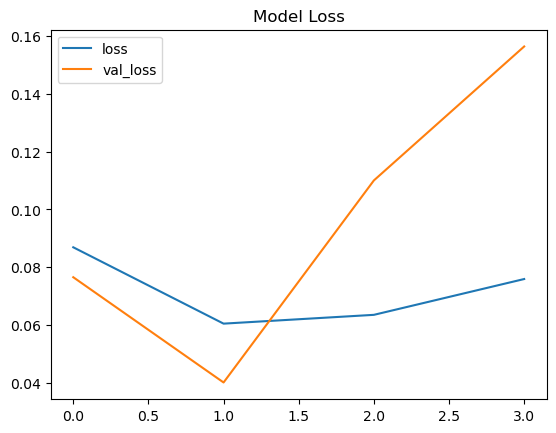

In [13]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

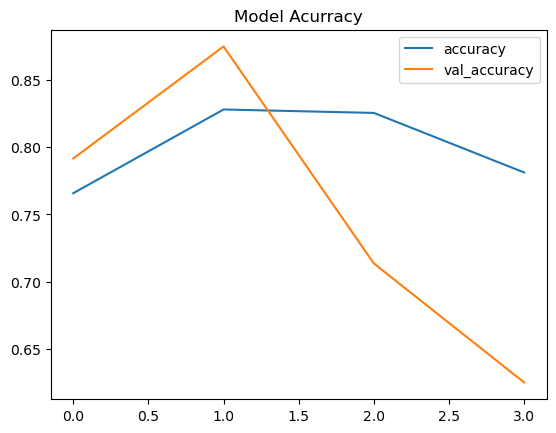

In [14]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [15]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.78125, Val_Accuracy: 0.625
Loss: 0.07591675221920013, Val_Loss: 0.15635982155799866


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step


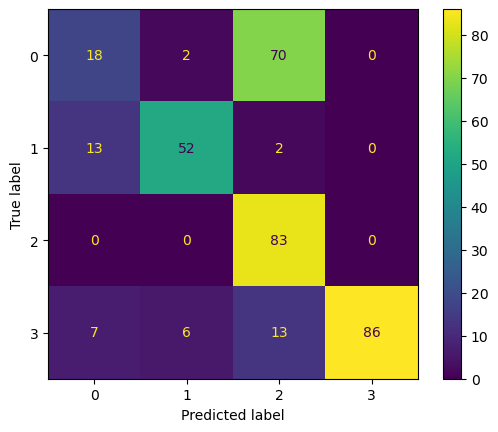

In [16]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


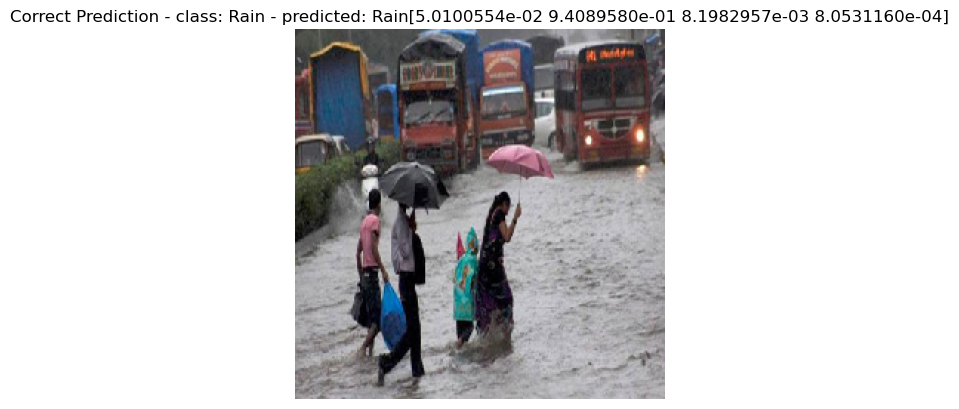

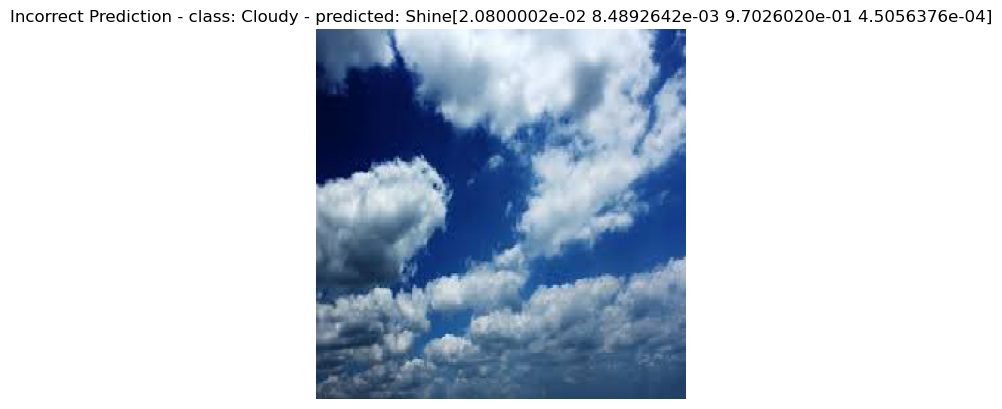

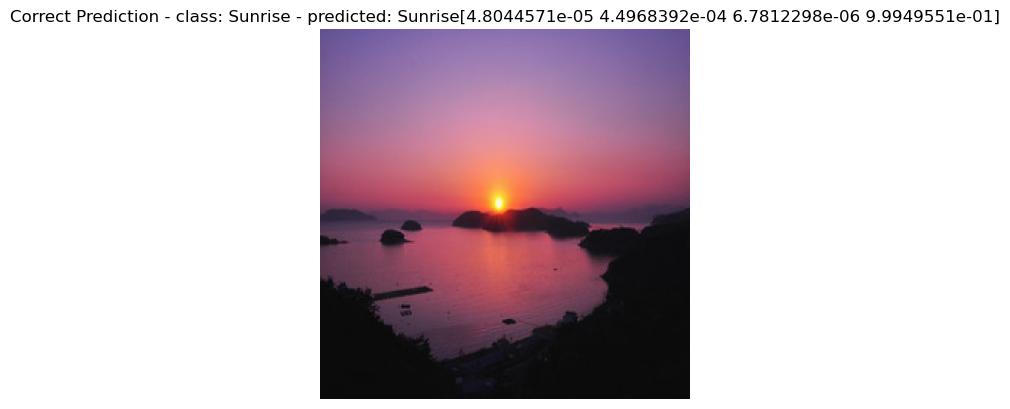

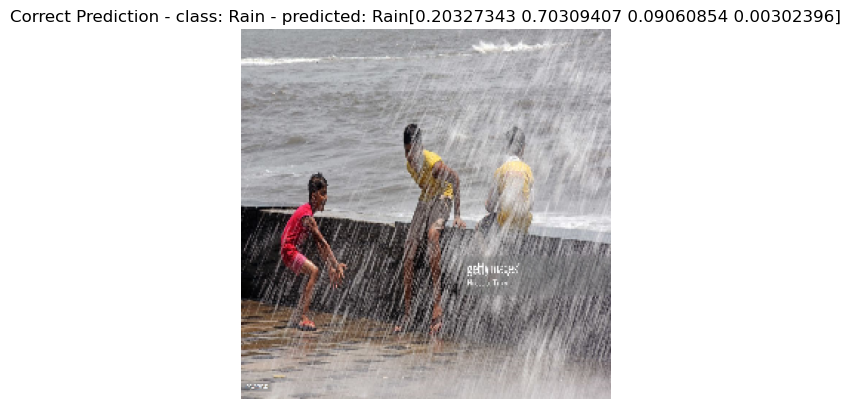

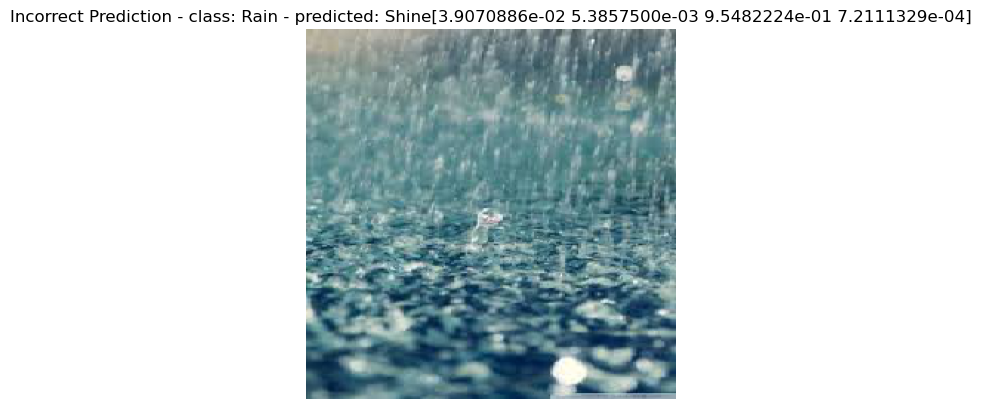

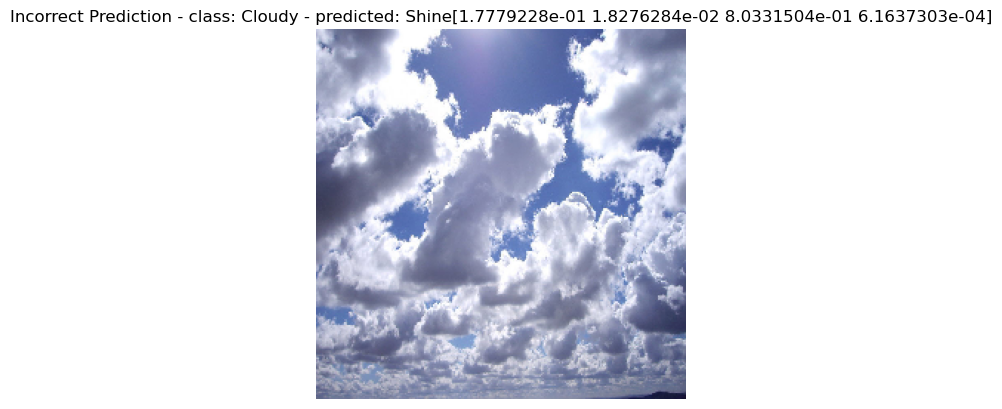

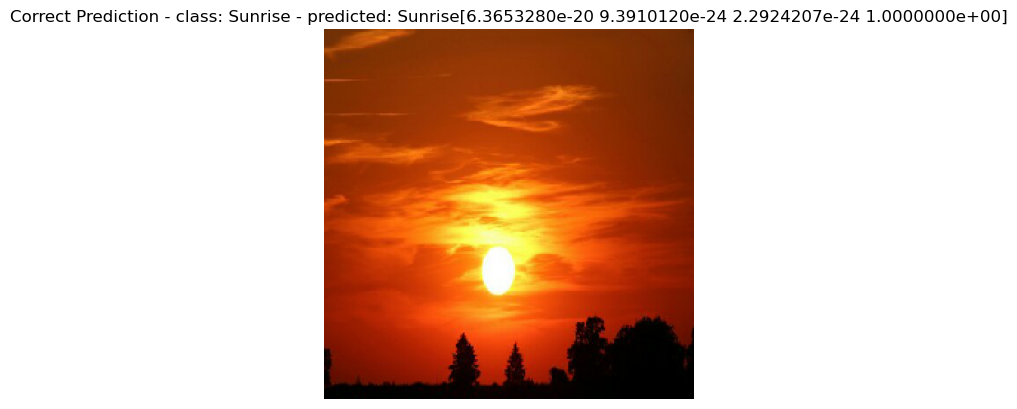

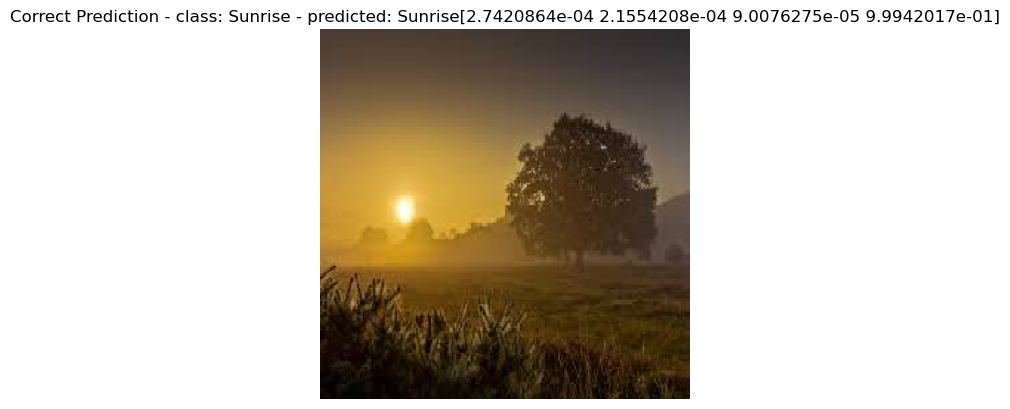

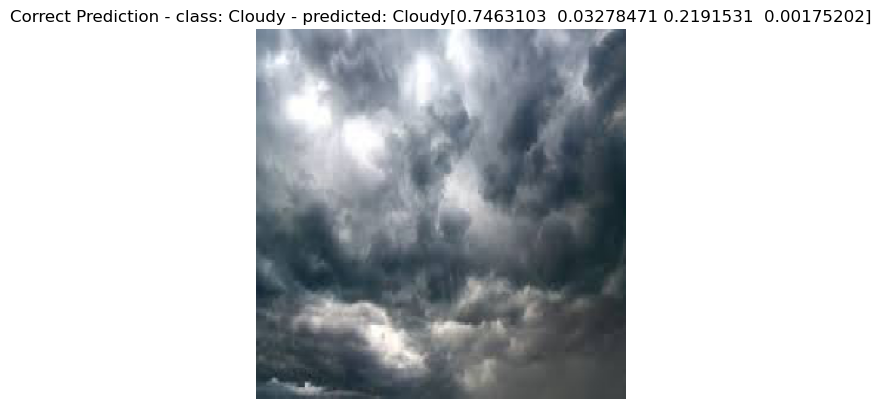

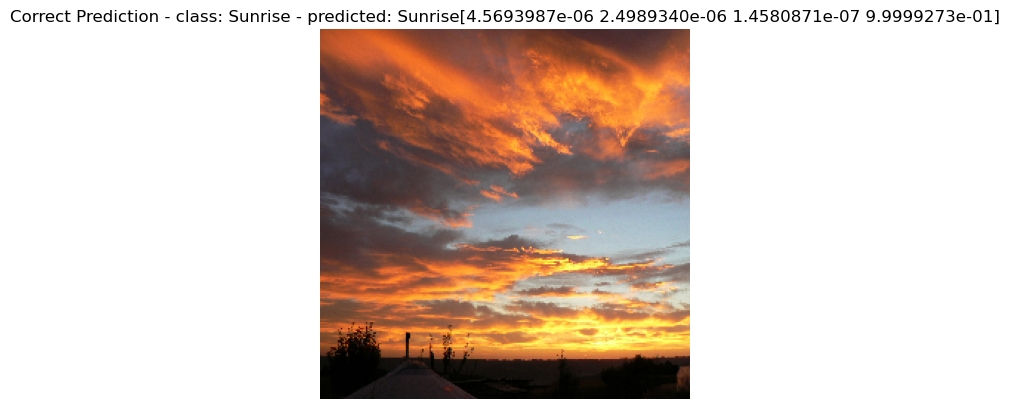

In [18]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

#### Attempt #2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
#compile and run the model
#how many epochs are required to generate an accurate model?

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs=100, 
    steps_per_epoch=train_generator.n // train_generator.batch_size-1,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size-1,
    callbacks=[early_stopping]
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 29s 963ms/step - accuracy: 0.8188 - loss: 0.0685 - val_accuracy: 0.8333 - val_loss: 0.0578
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7627 - loss: 0.0732 - val_accuracy: 0.7188 - val_loss: 0.1024
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 896ms/step - accuracy: 0.8585 - loss: 0.0527 - val_accuracy: 0.7188 - val_loss: 0.0943
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7650 - loss: 0.0928 - val_accuracy: 0.7500 - val_loss: 0.0952
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 880ms/step - accuracy: 0.8409 - loss: 0.0602 - val_accuracy: 0.8542 - val_loss: 0.0530
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9062 - loss: 0.0381 - val_accuracy: 0.7812 - val_loss: 0.0857
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 897ms/step - accuracy: 0.8777 - loss: 0.0483 - val_accuracy: 0.8333 - val_loss: 0.0642
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8472 - loss: 0.0563 - val_accu

In [24]:
results = pd.DataFrame(model.history.history)

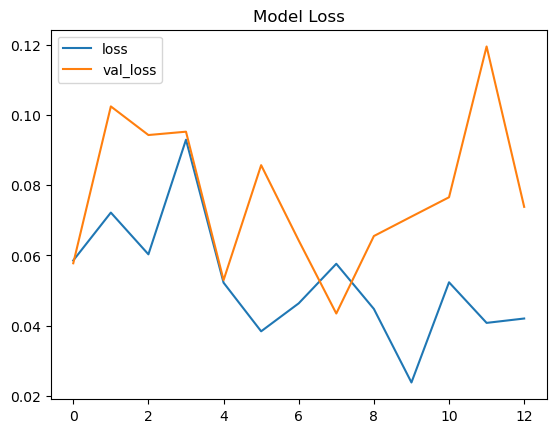

In [25]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

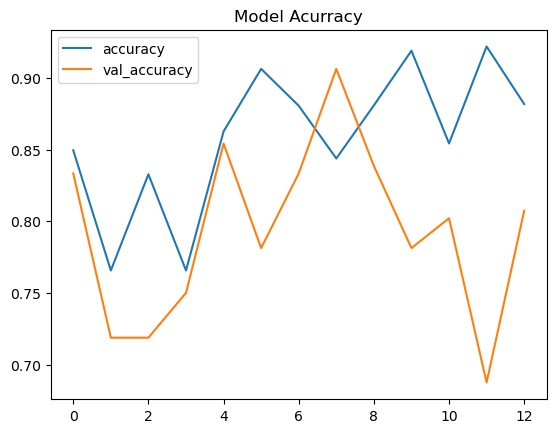

In [26]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step


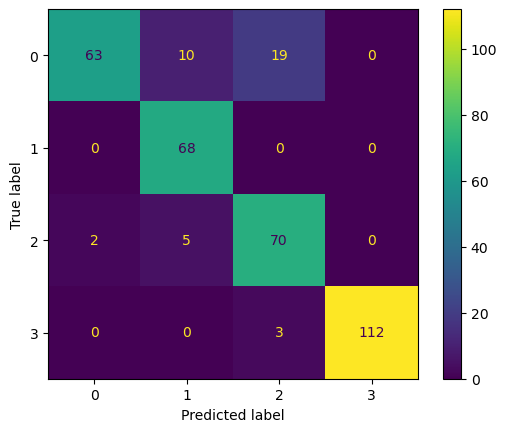

In [27]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
### Attempt #3

In [28]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8571 - loss: 0.0506 - val_accuracy: 0.8073 - val_loss: 0.0751
Epoch 2/50
 2/27 ━━━━━━━━━━━━━━━━━━━━ 21s 858ms/step - accuracy: 0.9062 - loss: 0.0330

C:\Users\Oksana Stepanova\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8773 - loss: 0.0406 - val_accuracy: 0.8750 - val_loss: 0.0561
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 949ms/step - accuracy: 0.8692 - loss: 0.0478 - val_accuracy: 0.7969 - val_loss: 0.0774
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7801 - loss: 0.0685 - val_accuracy: 0.7812 - val_loss: 0.0945
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 901ms/step - accuracy: 0.8529 - loss: 0.0518 - val_accuracy: 0.7865 - val_loss: 0.0852
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9225 - loss: 0.0257 - val_accuracy: 0.7500 - val_loss: 0.0993
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 921ms/step - accuracy: 0.8380 - loss: 0.0575 - val_accuracy: 0.8646 - val_loss: 0.0559
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8461 - loss: 0.0609 - val_accuracy: 0.7812 - val_loss: 0.0889
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 887ms/step - accuracy: 0.9197 - loss: 0.0349 - val_accuracy: 0.8646 - val_

In [29]:
results = pd.DataFrame(model.history.history)

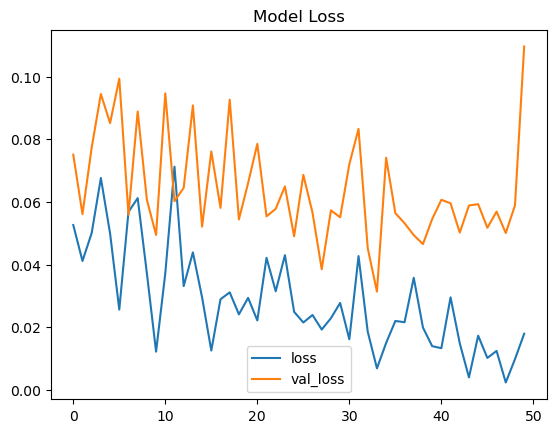

In [30]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

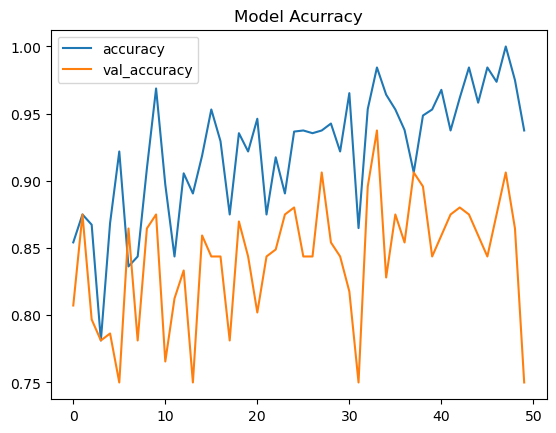

In [31]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step


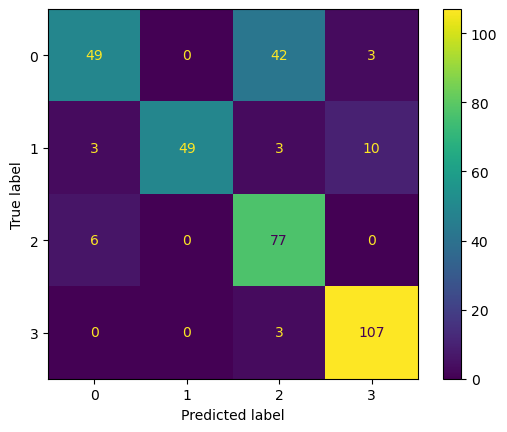

In [32]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Attempt #4

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [35]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [36]:
#compile and run the model
#how many epochs are required to generate an accurate model?

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs=100, 
    steps_per_epoch=train_generator.n // train_generator.batch_size-1,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size-1,
    callbacks=[early_stopping]
)

Epoch 1/100


C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - accuracy: 0.4128 - loss: 1.2922 - val_accuracy: 0.6250 - val_loss: 0.8654
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6678 - loss: 0.8137 - val_accuracy: 0.6562 - val_loss: 0.8166
Epoch 3/100


C:\Users\Oksana Stepanova\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 674ms/step - accuracy: 0.6677 - loss: 0.7768 - val_accuracy: 0.7552 - val_loss: 0.6932
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7049 - loss: 0.6961 - val_accuracy: 0.8750 - val_loss: 0.4486
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 730ms/step - accuracy: 0.7984 - loss: 0.5724 - val_accuracy: 0.7292 - val_loss: 0.7278
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7789 - loss: 0.8734 - val_accuracy: 0.7812 - val_loss: 0.5913
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 737ms/step - accuracy: 0.8244 - loss: 0.5117 - val_accuracy: 0.7188 - val_loss: 0.7792
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7963 - loss: 0.5074 - val_accuracy: 0.8125 - val_loss: 0.6961
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 710ms/step - accuracy: 0.8358 - loss: 0.4514 - val_accuracy: 0.7448 - val_loss: 0.6049


In [37]:
results = pd.DataFrame(model.history.history)

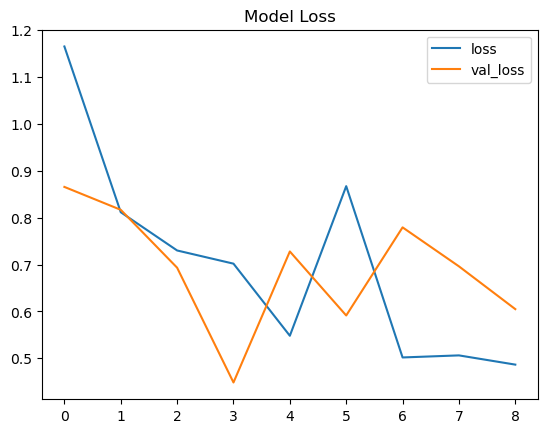

In [38]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

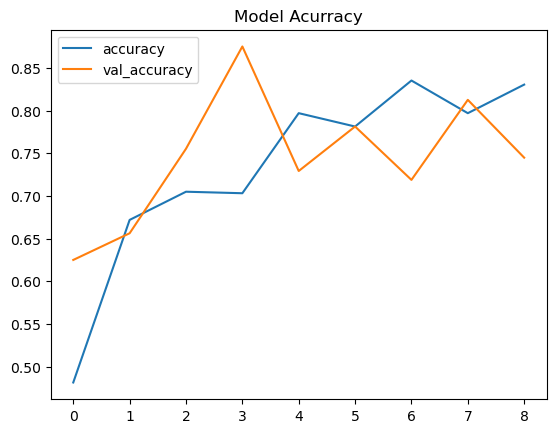

In [39]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


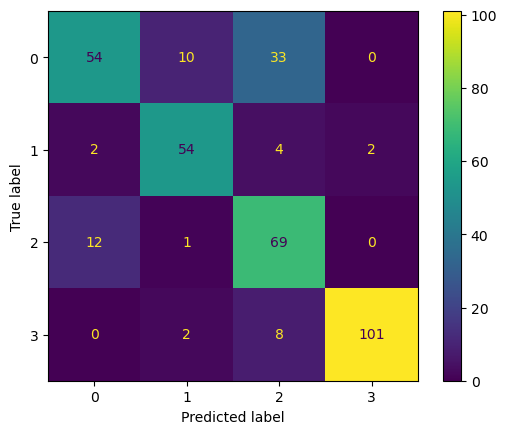

In [40]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Attempt #5

In [41]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=64,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [42]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [43]:
#compile and run the model
#how many epochs are required to generate an accurate model?

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs=100, 
    steps_per_epoch=train_generator.n // train_generator.batch_size-1,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size-1,
    callbacks=[early_stopping]
)

Epoch 1/100


C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3899 - loss: 1.3395 - val_accuracy: 0.5365 - val_loss: 1.1145
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.4722 - loss: 1.1124 - val_accuracy: 0.3750 - val_loss: 1.1320


C:\Users\Oksana Stepanova\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6149 - loss: 0.9852 - val_accuracy: 0.5990 - val_loss: 0.8028
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6947 - loss: 0.6681 - val_accuracy: 0.7188 - val_loss: 0.6711
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7347 - loss: 0.6607 - val_accuracy: 0.7448 - val_loss: 0.8432
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7668 - loss: 0.6472 - val_accuracy: 0.8438 - val_loss: 0.3833
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7828 - loss: 0.5644 - val_accuracy: 0.7604 - val_loss: 0.7251
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7572 - loss: 0.6463 - val_accuracy: 0.7500 - val_loss: 0.6749
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8155 - loss: 0.5568 - val_accuracy: 0.8073 - val_loss: 0.5534
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7388 - loss: 0.5836 - val_accuracy: 0.

In [44]:
results = pd.DataFrame(model.history.history)

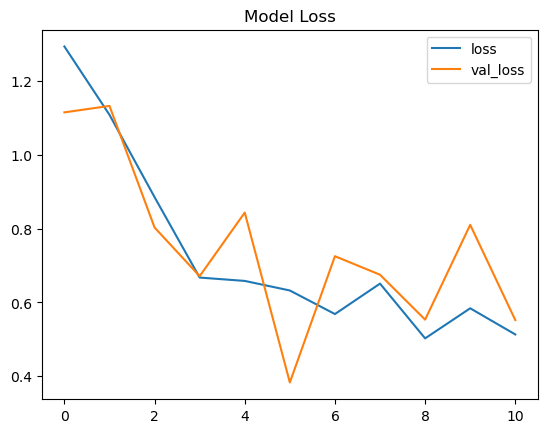

In [45]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

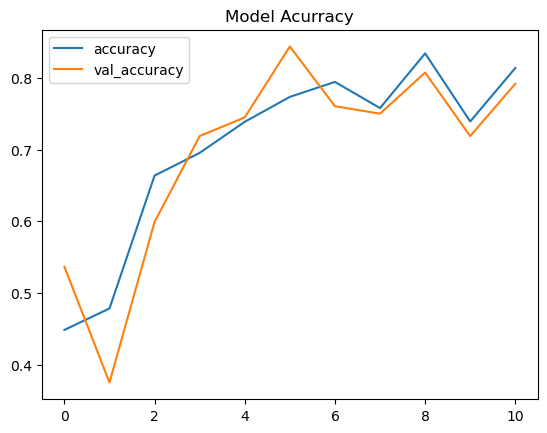

In [46]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


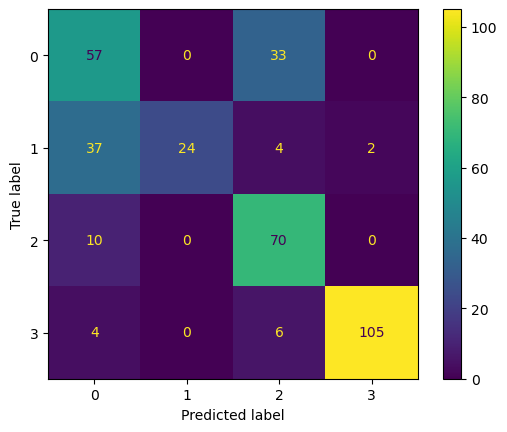

In [47]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Attempt #6

In [48]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=64,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [49]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [50]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

Epoch 1/50


C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3659 - loss: 0.1825 - val_accuracy: 0.5312 - val_loss: 0.1570
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.4990 - loss: 0.1582 - val_accuracy: 0.4375 - val_loss: 0.1561
Epoch 3/50


C:\Users\Oksana Stepanova\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5776 - loss: 0.1363 - val_accuracy: 0.7604 - val_loss: 0.1135
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6526 - loss: 0.1160 - val_accuracy: 0.6875 - val_loss: 0.1143
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7378 - loss: 0.0988 - val_accuracy: 0.7865 - val_loss: 0.0868
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7813 - loss: 0.0915 - val_accuracy: 0.6250 - val_loss: 0.1112
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7661 - loss: 0.0791 - val_accuracy: 0.6667 - val_loss: 0.1081
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7416 - loss: 0.0847 - val_accuracy: 0.8125 - val_loss: 0.0810
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8094 - loss: 0.0710 - val_accuracy: 0.7552 - val_loss: 0.0879
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8846 - loss: 0.0560 - val_accuracy: 0.7500 - val_loss: 0.

In [51]:
results = pd.DataFrame(model.history.history)

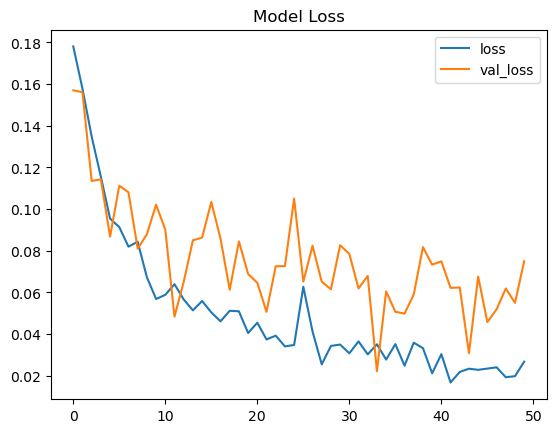

In [52]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

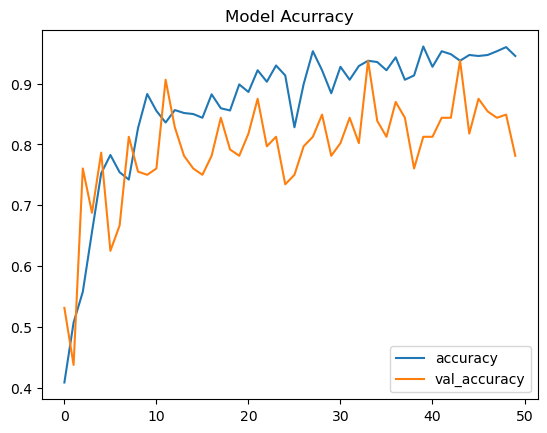

In [53]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


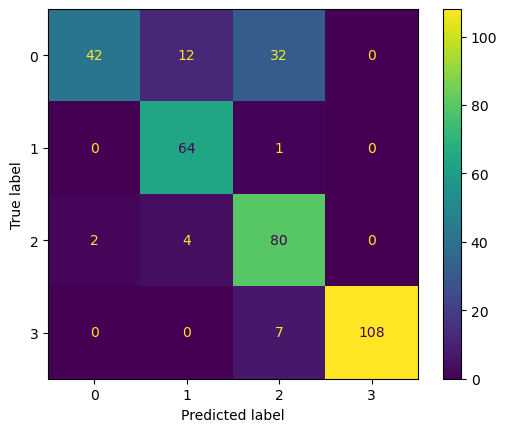

In [54]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [55]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


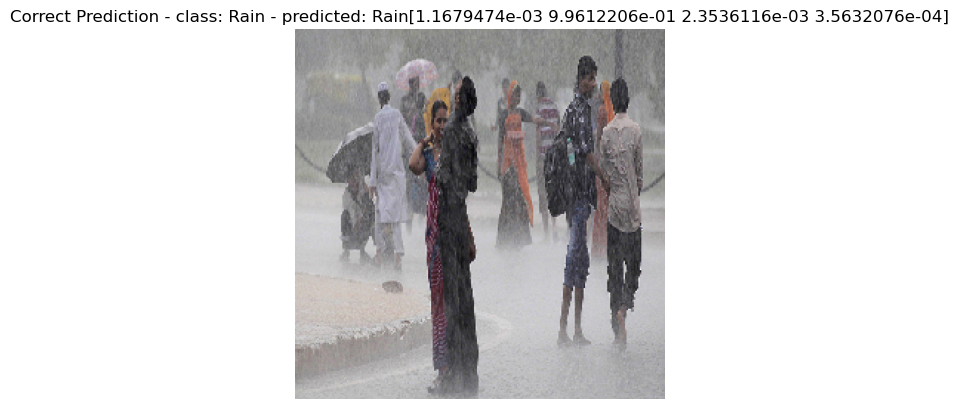

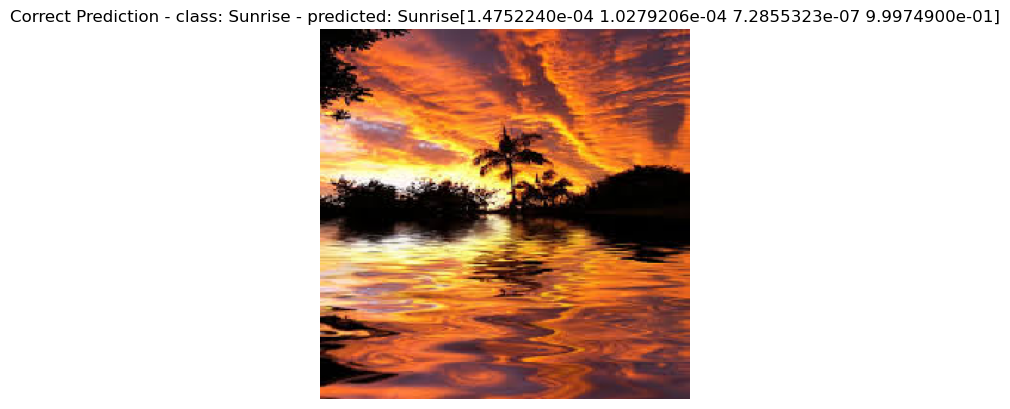

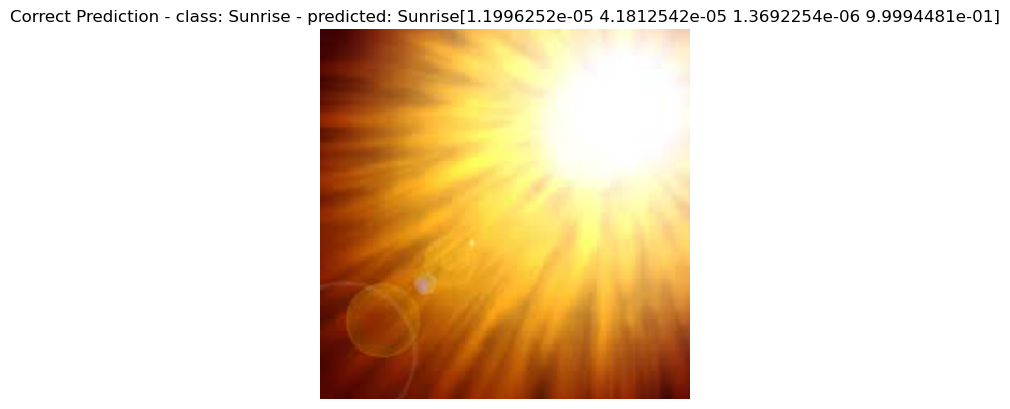

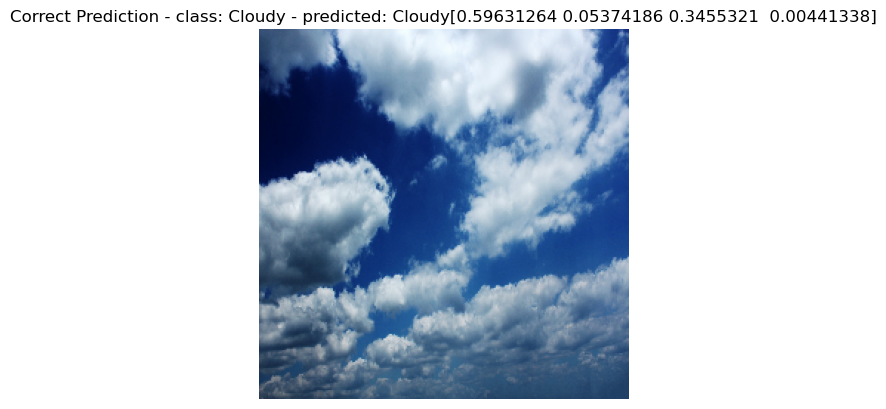

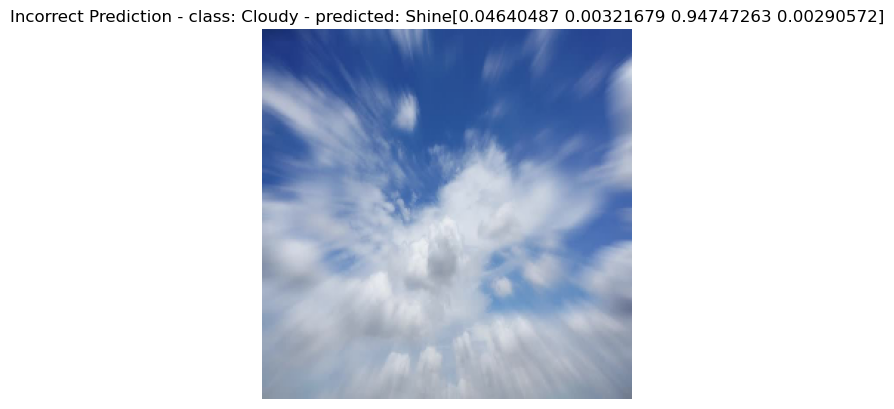

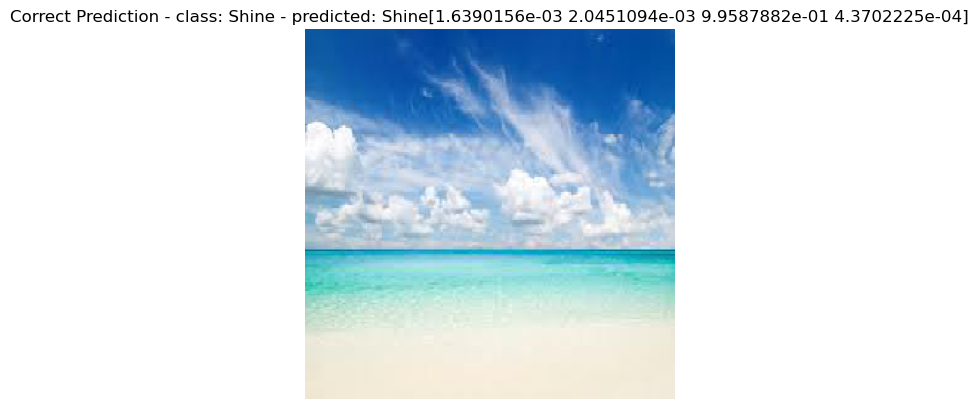

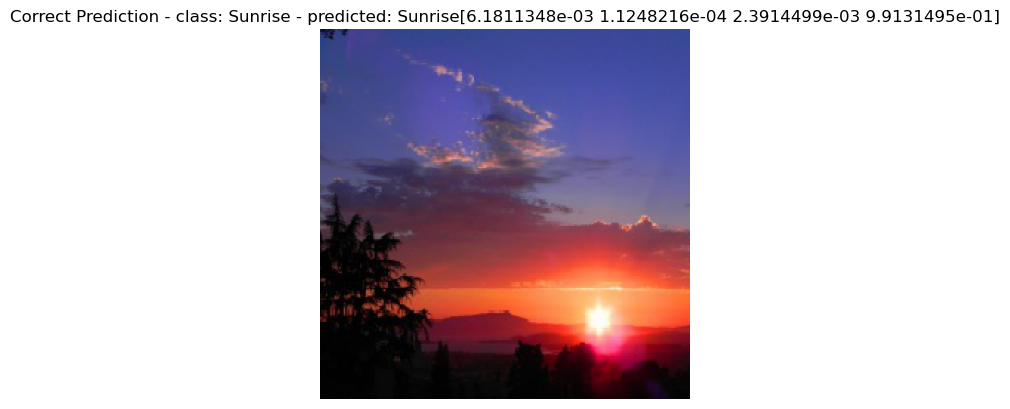

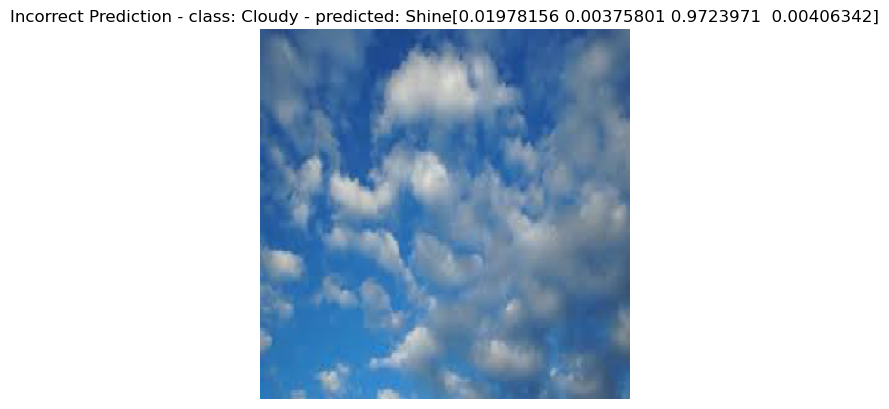

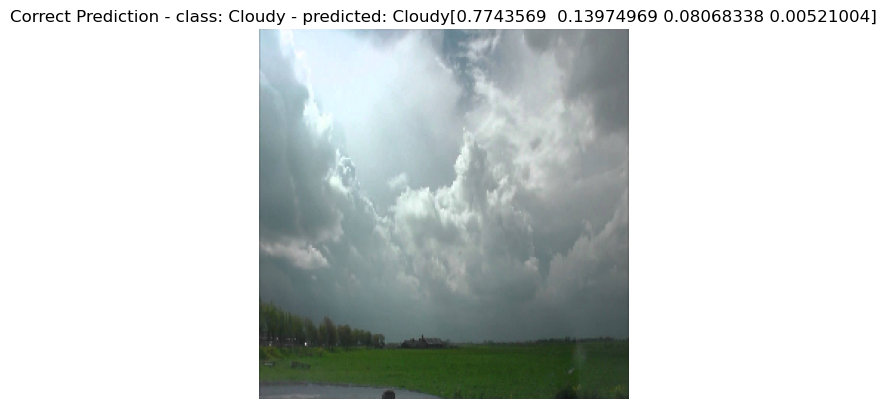

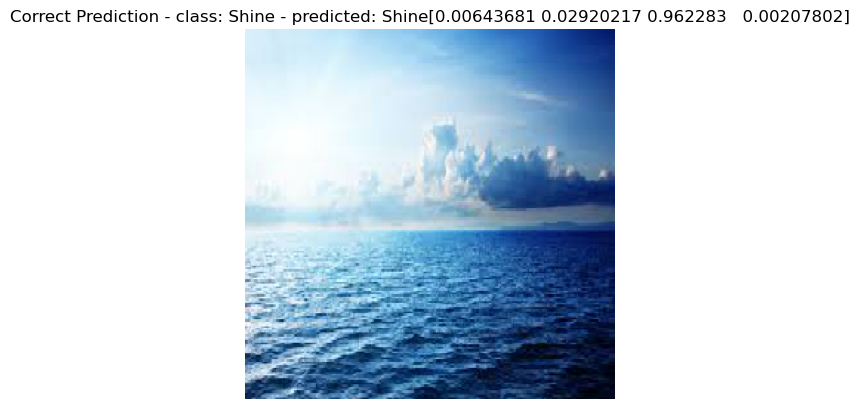

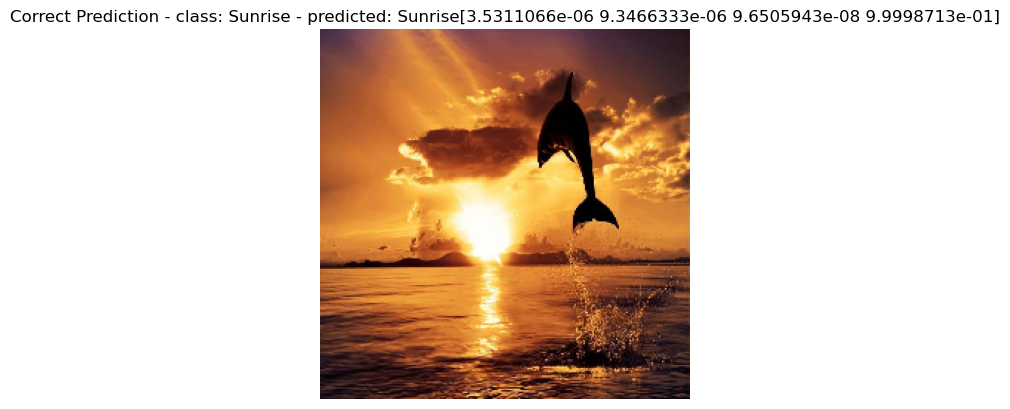

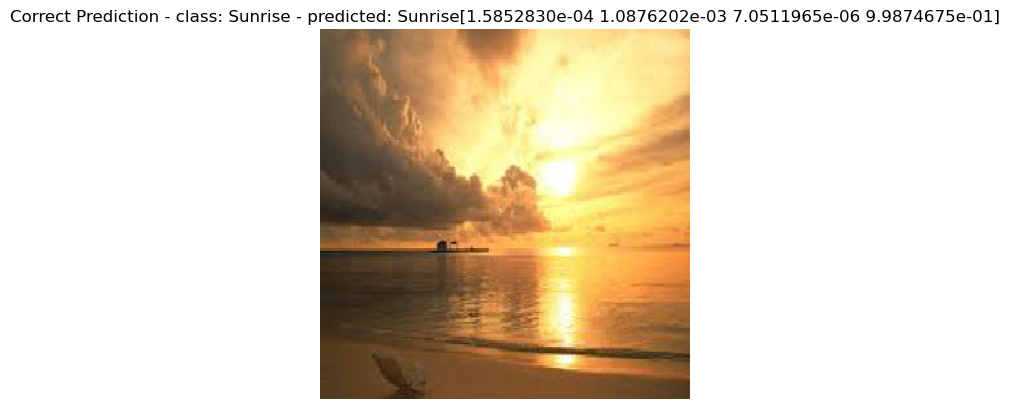

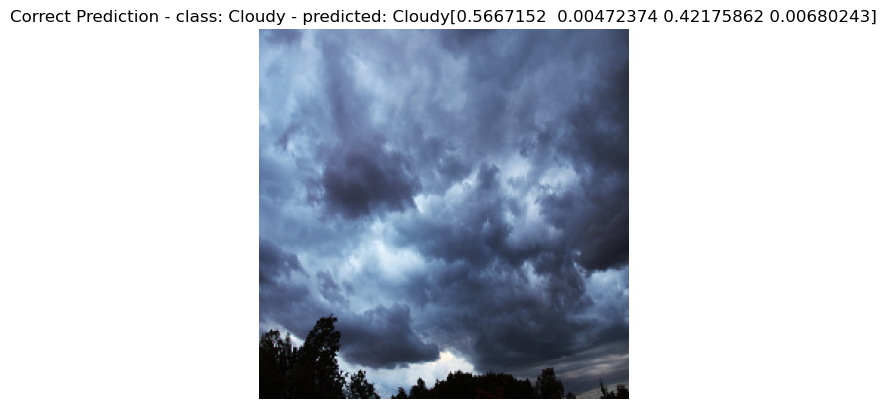

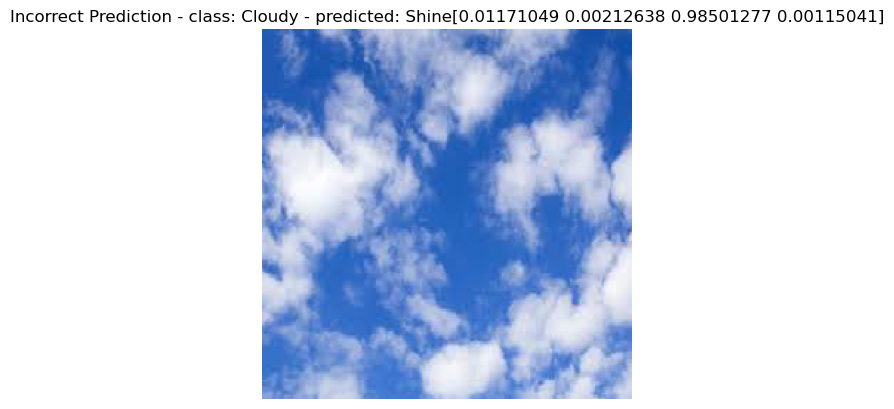

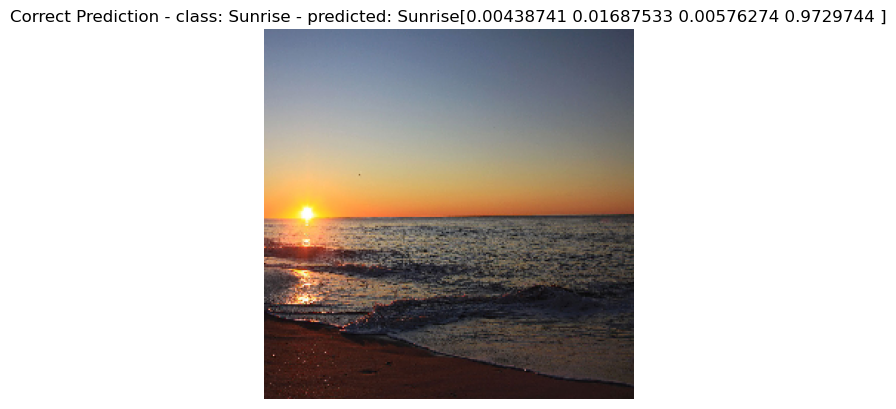

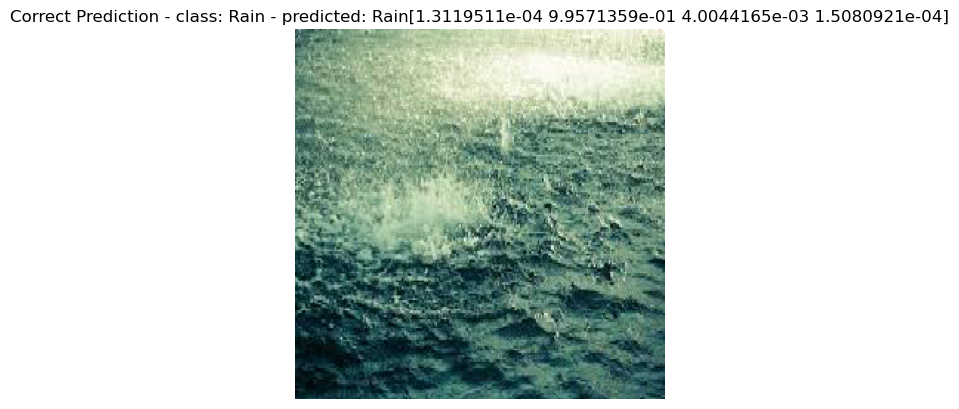

In [56]:
predict_one(model, 16) #<--you can show multiple pictures with this command. Just fill in the number you want to see.